## Set Up

In [23]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Scrape Data

In [14]:
## Wikipedia url to scrape
url = 'https://en.wikipedia.org/wiki/List_of_cities_by_sunshine_duration#Africa'

## Send get request
response = requests.get(url)

## Parse data from page
soup = BeautifulSoup(response.content, 'html.parser')

## Locate the table and extract the rows
table = soup.find('table', {'class': 'wikitable'})
rows = table.find_all('tr')[1:]

## Parse data into lists
countries = []
cities = []
sunshine_hours = []

for row in rows:
    cells = row.find_all('td')
    countries.append(cells[0].text.strip())
    cities.append(cells[1].text.strip())
    sunshine_hours.append([cell.text.strip() for cell in cells[2:-2]])

## Create dataframe
df = pd.DataFrame({
    'Country': countries,
    'City': cities,
    'Jan': [x[0] for x in sunshine_hours],
    'Feb': [x[1] for x in sunshine_hours],
    'Mar': [x[2] for x in sunshine_hours],
    'Apr': [x[3] for x in sunshine_hours],
    'May': [x[4] for x in sunshine_hours],
    'Jun': [x[5] for x in sunshine_hours],
    'Jul': [x[6] for x in sunshine_hours],
    'Aug': [x[7] for x in sunshine_hours],
    'Sep': [x[8] for x in sunshine_hours],
    'Oct': [x[9] for x in sunshine_hours],
    'Nov': [x[10] for x in sunshine_hours],
    'Dec': [x[11] for x in sunshine_hours],
})


## Preprocessing

The goal here is to aggregate the average sunlight hours by country

In [15]:
## Drop the city column since we want to aggregate by country
df.drop(columns='City', inplace=True)

## Convert the numerical data from objects to floats
df.iloc[:,1:] = df.iloc[:,1:].astype('float')

## Calculate the mean sunlight hours by country
df = df.groupby('Country').mean().reset_index()

## Data Visualization

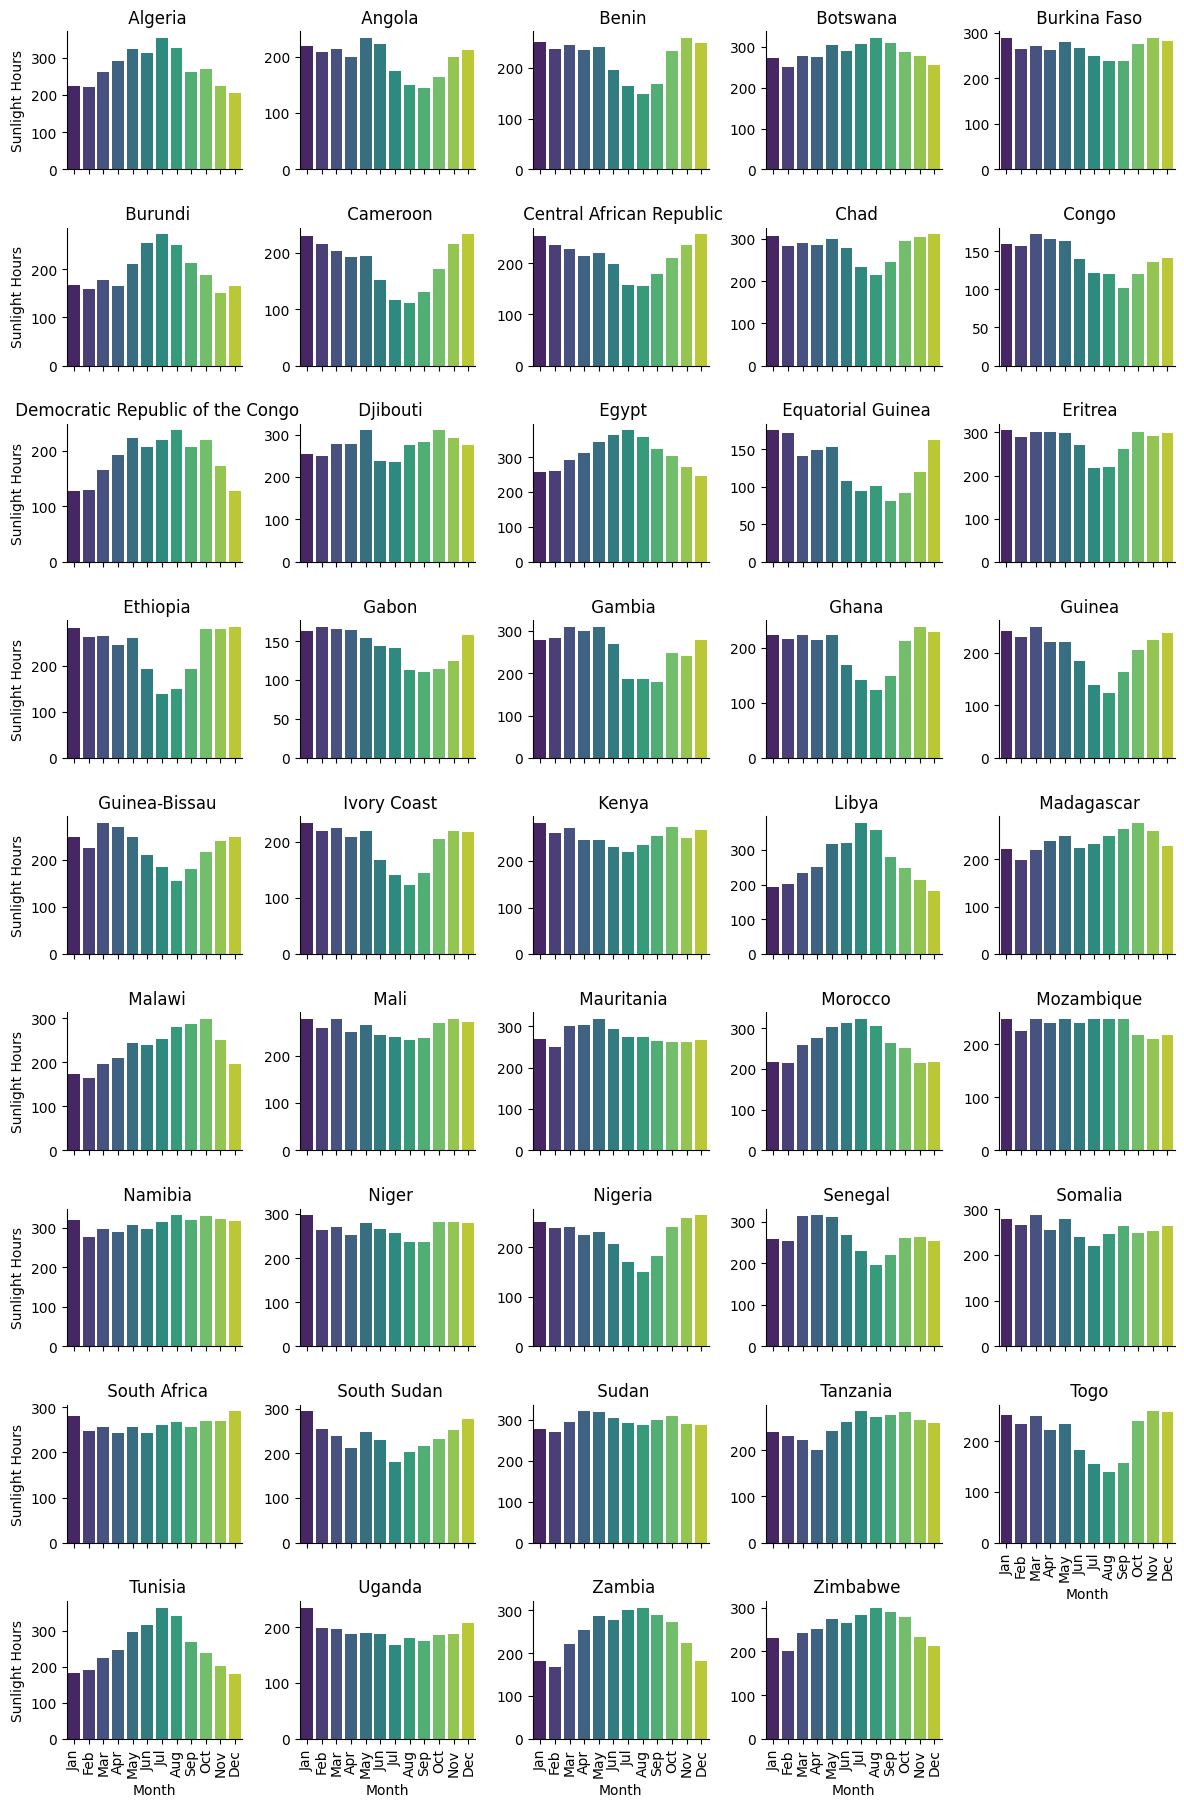

In [49]:
# Melt the data into long format
df_melt = pd.melt(df, id_vars=['Country'], var_name='Month', value_name='Sunlight Hours')

# Create a grid of bar charts using seaborn's FacetGrid
grid = sns.FacetGrid(df_melt, col='Country', col_wrap=5, height=2, aspect=1.2, sharey=False)

# Plot the data as a bar chart in each subplot
grid.map(sns.barplot, 'Month', 'Sunlight Hours', order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], palette='viridis')

# Set the titles for each subplot
for ax in grid.axes.flat:
    ax.set_title(ax.get_title().split('=')[1])
    
# Set the x-axis label for the last row of subplots
grid.axes[-1].set_xlabel('Month')

for ax in grid.axes.flat:
    ax.tick_params(axis='x', labelrotation=90)
    
# Show the plot
sns.despine()
plt.show()
